### The University of Melbourne, School of Computing and Information Systems
# COMP90086 Computer Vision, 2024 Semester 2

## Assignment 1

**Student Name:**    `PLEASE ENTER YOUR NAME HERE`

**Student ID:**     `PLEASE ENTER YOUR ID HERE`

This iPython notebook is a template which you should use for your Assignment 1 submission. This file should be submitted at the **Assignment 1: Code** link on the LMS, along with any images needed to run your code.

In addition to this file, you should submit a written report explaining your results at the **Assignment 1: Report** link on the LMS. Please see the assignment specification for details on what must be included in the report for each question.

*Adding proper comments to your code is MANDATORY.*

In [1]:
# Additional code for Question 2

import numpy as np
import cv2

# Real-world heights for sample objects, in meters (m)
img_dog = 'dog.png'
h_dog = 0.4
img_statue = 'statue.png'
h_statue = 1.8
img_elephant = 'elephant.png'
h_elephant = 3.5

# Read a transparent PNG image
transparent_obj = cv2.imread('dog.png', cv2.IMREAD_UNCHANGED)
obj = transparent_obj[:,:,:3]
alpha = transparent_obj[:,:,3]

# Paste object onto background with transparency
bg = np.ones_like(obj, dtype=np.uint8) * 255
alpha = np.tile(alpha[:,:,np.newaxis], (1,1,3)).astype(np.float32) / 255.0
pasted_object = (obj.astype(np.float32) * alpha) + (bg.astype(np.float32) * (1-alpha))
pasted_object = pasted_object.astype(np.uint8)

### 1. Image filtering

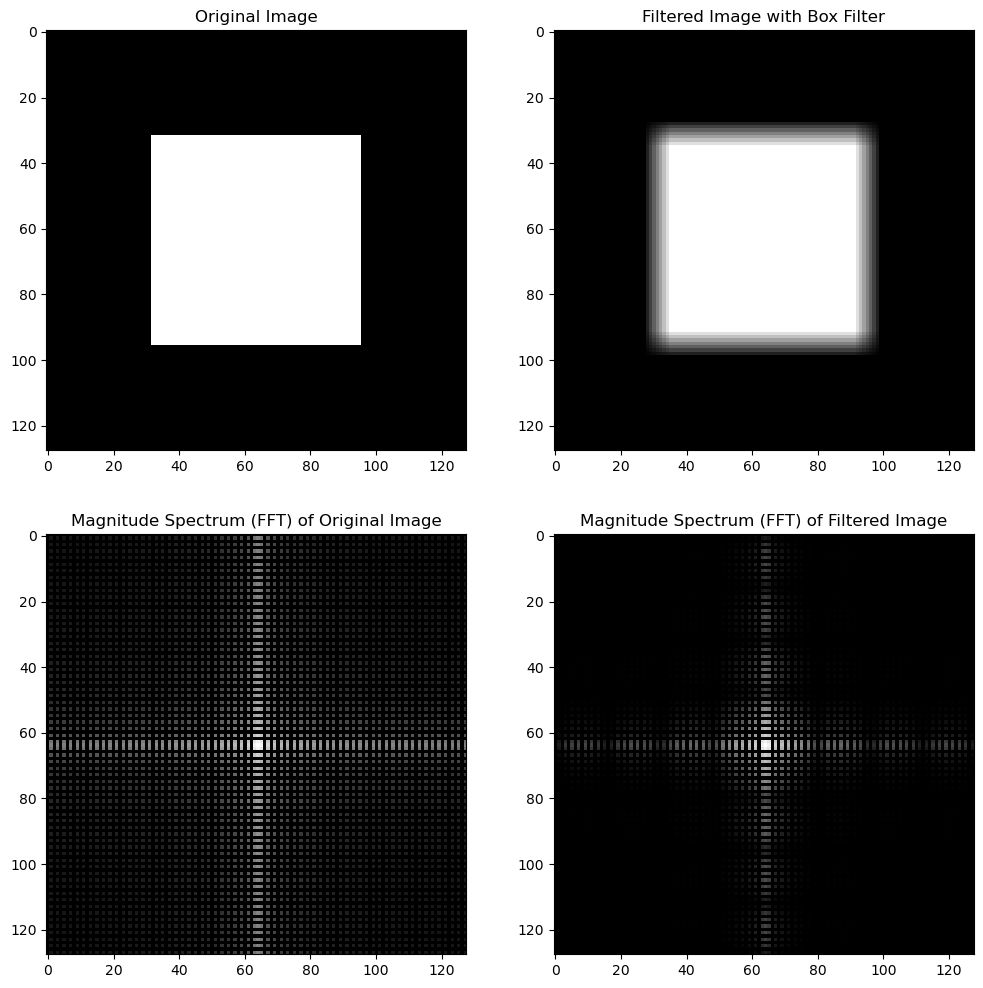

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# 生成一个简单的二维信号（例如，一个简单的图像）
image = np.zeros((128, 128))
image[32:96, 32:96] = 1  # 创建一个中心为白色的方块

# 定义一个3x3的盒式滤波器
box_filter = np.ones((8, 8)) / (8*8)

# 对图像应用盒式滤波器
filtered_image = convolve(image, box_filter)

# 计算滤波后的二维傅里叶变换
fft_filtered_image = np.fft.fft2(filtered_image)

# 计算原图像的二维傅里叶变换
fft_image = np.fft.fft2(image)


# 将零频率分量移到中心
fft_filtered_image_shifted = np.fft.fftshift(fft_filtered_image)
fft_image_shifted = np.fft.fftshift(fft_image)

# 计算幅值谱
magnitude_spectrum_filtered = np.abs(fft_filtered_image_shifted)
magnitude_spectrum = np.abs(fft_image_shifted)

# 可视化原始图像、滤波后图像及其频域表示
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image with Box Filter')

plt.subplot(2, 2, 3)
plt.imshow(np.log1p(magnitude_spectrum), cmap='gray')
plt.title('Magnitude Spectrum (FFT) of Original Image')

plt.subplot(2, 2, 4)
plt.imshow(np.log1p(magnitude_spectrum_filtered), cmap='gray')
plt.title('Magnitude Spectrum (FFT) of Filtered Image')

plt.show()


In [21]:
image

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

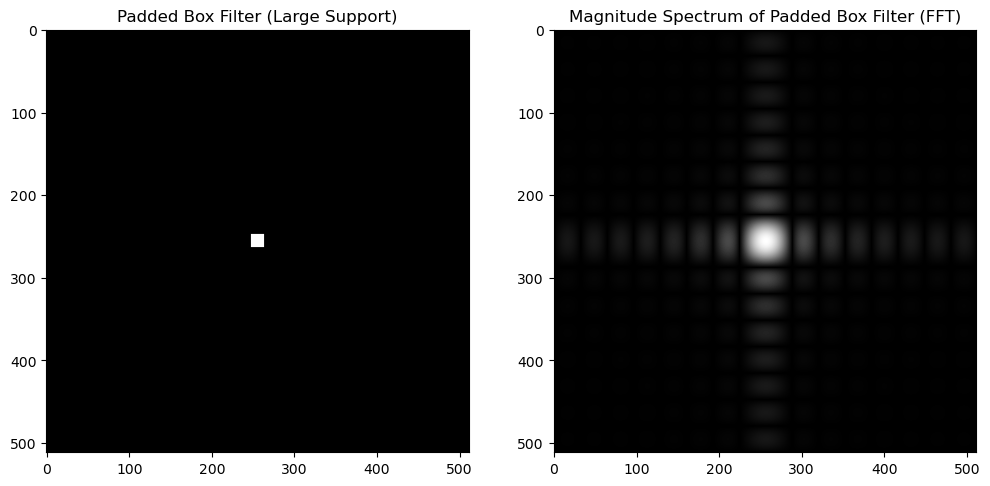

Text(0.5, 1.0, 'Magnitude Spectrum (FFT) of Filtered Image')

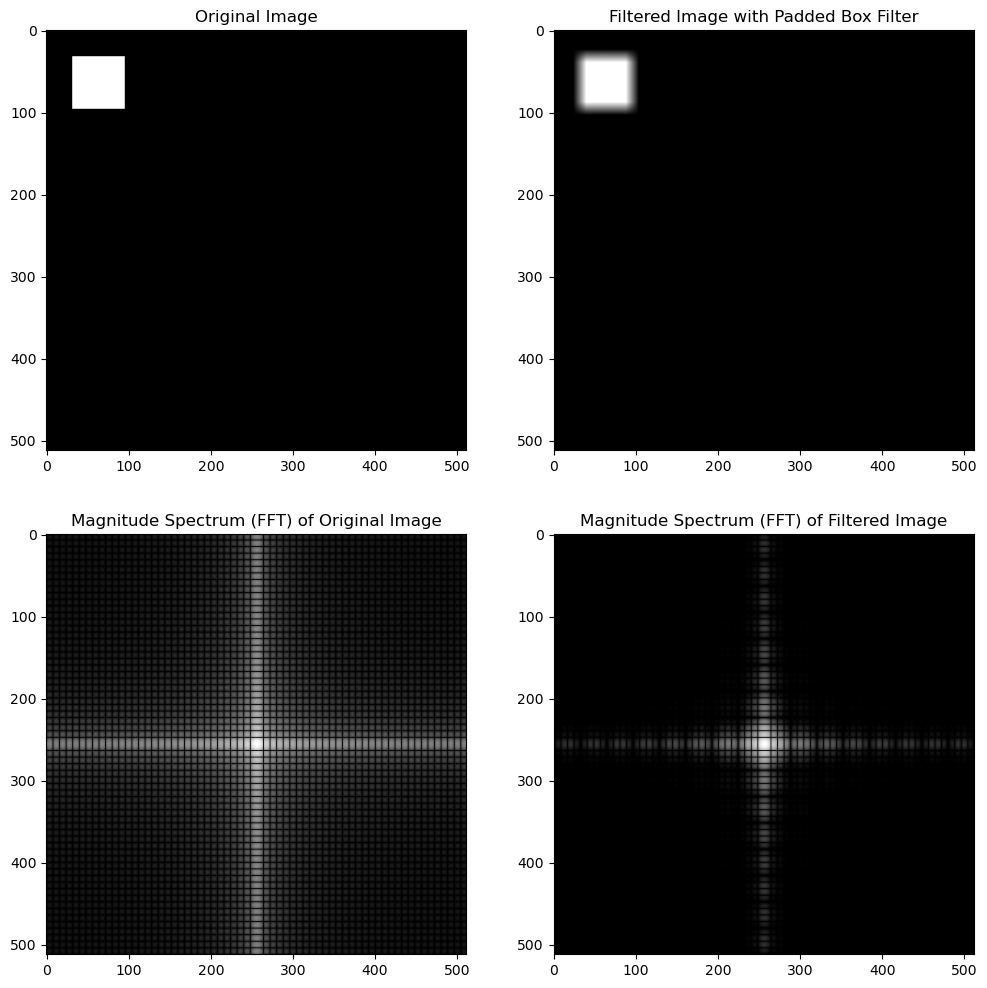

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, fftshift
from scipy.ndimage import convolve

# 定义一个3x3的盒式滤波器
small_box_filter = np.ones((16, 16)) / (16*16)

# 对滤波器进行零填充，扩展到一个大的支持域，例如512x512
large_support_size = (512, 512)
padded_box_filter = np.zeros(large_support_size)
# 计算中心位置的起始索引
start_x = large_support_size[0] // 2 - small_box_filter.shape[0] // 2
start_y = large_support_size[1] // 2 - small_box_filter.shape[1] // 2

# 将小的盒式滤波器放置在中心位置
padded_box_filter[start_x:start_x + 16, start_y:start_y + 16] = small_box_filter

# 计算二维傅里叶变换
fft_padded_box_filter = fft2(padded_box_filter)

# 将零频率分量移到中心
fft_padded_box_filter_shifted = fftshift(fft_padded_box_filter)

# 计算幅值谱
magnitude_spectrum_padded = np.abs(fft_padded_box_filter_shifted)

# 可视化滤波器及其频域表示
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(padded_box_filter, cmap='gray')
plt.title('Padded Box Filter (Large Support)')

plt.subplot(1, 2, 2)
plt.imshow(np.log1p(magnitude_spectrum_padded), cmap='gray')
plt.title('Magnitude Spectrum of Padded Box Filter (FFT)')

plt.show()


# 生成一个简单的二维信号（例如，一个简单的图像）
image = np.zeros((512, 512))
image[32:96, 32:96] = 1  # 创建一个中心为白色的方块

# 计算二维傅里叶变换
fft_image = np.fft.fft2(image)

# 将零频率分量移到中心
fft_image_shifted = np.fft.fftshift(fft_image)

# 计算幅值谱
magnitude_spectrum = np.abs(fft_image_shifted)



# 使用 box filter 进行低通滤波
filtered_image = convolve(image, padded_box_filter)

# 计算滤波后的二维傅里叶变换
fft_filtered_image = np.fft.fft2(filtered_image)

# 将零频率分量移到中心
fft_filtered_image_shifted = np.fft.fftshift(fft_filtered_image)

# 计算幅值谱
magnitude_spectrum_filtered = np.abs(fft_filtered_image_shifted)

# 可视化原始图像、滤波后图像及其频域表示
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image with Padded Box Filter')

plt.subplot(2, 2, 3)
plt.imshow(np.log1p(magnitude_spectrum), cmap='gray')
plt.title('Magnitude Spectrum (FFT) of Original Image')

plt.subplot(2, 2, 4)
plt.imshow(np.log1p(magnitude_spectrum_filtered), cmap='gray')
plt.title('Magnitude Spectrum (FFT) of Filtered Image')






Key points: 
1. 在frequency domain中，box filter会滤掉高频分量保留低频分量，所以频谱图中越高频的分量越容易被滤掉，所以在频谱图中，随着频率的增加，图像的亮度会逐渐减小。
2. 对于原图像，box filter会使图像变得模糊，因为高频分量被滤掉了，只保留了低频分量。

### 2. AR object rendering

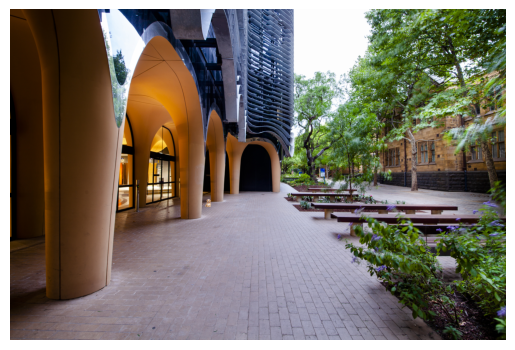

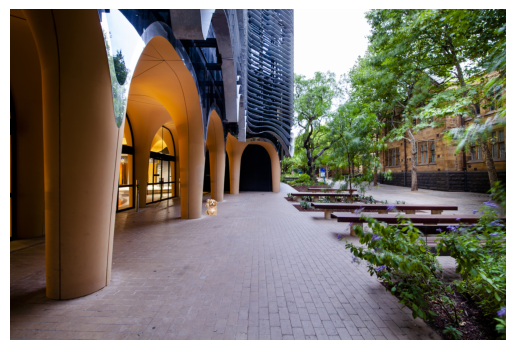

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 定义相机参数
focal_length = 15  # 焦距，单位毫米
camera_height = 1600  # 相机高度，单位毫米
sensor_width = 36  # 感应器宽度，单位毫米
sensor_height = 24  # 感应器高度，单位毫米

# 读取背景图像
bg = cv2.imread('background.jpg')

# 计算图像的像素与世界的比例关系
image_height, image_width = bg.shape[:2]
fx = (focal_length / sensor_width) * image_width
fy = (focal_length / sensor_height) * image_height

def get_object_height_in_image(real_world_height, z_world):

    # 将高度转换为毫米
    real_world_height_mm = real_world_height * 1000
    # 计算物体在图像中的高度
    h_image = (real_world_height_mm * focal_length) / z_world
    return int(h_image * (image_height / sensor_height))

def paste_object(bg, obj_img, alpha, pos_x, pos_y, obj_height_px):

    obj_img = cv2.resize(obj_img, (int(obj_img.shape[1] * obj_height_px / obj_img.shape[0]), obj_height_px))
    alpha = cv2.resize(alpha, (int(alpha.shape[1] * obj_height_px / alpha.shape[0]), obj_height_px))

    y1, y2 = pos_y, pos_y + obj_img.shape[0]
    x1, x2 = pos_x, pos_x + obj_img.shape[1]

    alpha = alpha.astype(np.float32) / 255.0
    obj_img = obj_img.astype(np.float32)

    for c in range(0, 3):
        bg[y1:y2, x1:x2, c] = (alpha * obj_img[:, :, c] + (1 - alpha) * bg[y1:y2, x1:x2, c])

    return bg

# 示例：将狗放置在图像的底部中央
transparent_obj = cv2.imread(img_dog, cv2.IMREAD_UNCHANGED)
obj = transparent_obj[:, :, :3]
alpha = transparent_obj[:, :, 3]

# 假设狗放在地面上，离相机10米
z_world = 10000  # 单位：毫米
pos_x = (image_width - obj.shape[1]) // 2
pos_y = image_height - obj.shape[0]

# 计算狗在图像中的高度
obj_height_px = get_object_height_in_image(h_dog, z_world)

# 将狗粘贴到背景图像上
result_img = paste_object(bg, obj, alpha, pos_x, pos_y, obj_height_px)

# 在Jupyter Notebook中展示结果图像
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.axis('off')  # 隐藏坐标轴
plt.show()


# 假设狗放在地面上，离相机5米
z_world = 5000  # 单位：毫米
pos_x = (image_width - obj.shape[1]) // 2
pos_y = image_height - obj.shape[0]

# 计算狗在图像中的高度
obj_height_px = get_object_height_in_image(h_dog, z_world)

# 将狗粘贴到背景图像上
result_img = paste_object(bg, obj, alpha, pos_x, pos_y, obj_height_px)

plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.axis('off')  # 隐藏坐标轴
plt.show()

# cv2.imwrite('result.jpg', result_img)


图像中物体的高度 = （真实高度*焦距/物体相机距离）* (图像高度/sensor高度)